## Tutorial 1 - Part I
## PCA and LDA

#### Comparison of PCA and LDA on 2D projection of Iris data

A sklearn example: http://scikit-learn.org/0.17/auto_examples/decomposition/plot_pca_vs_lda.html

Documentation from sklearn on PCA and LDA:

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.
Principal Component Analysis (PCA) applied to this data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# %matplotlib inline: To make matplotlib inline graphics
%matplotlib inline 
import matplotlib.pyplot as plt

Load iris data from sklearn

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
# Check the dimentionality of the data
print("X.shape %s" %str(X.shape))
print("y.shape %s" %str(y.shape))
print(X[1:10,:])
print(y)
print("X mean %s" %str(X.mean(0)))
print("X var %s" %str(X.var(0)))

X.shape (150, 4)
y.shape (150,)
[[ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
X mean [ 5.84333333  3.054       3.75866667  1.19866667]
X var [ 0.68112222  0.18675067  3.09242489  0.57853156]


In [4]:
#pca = PCA(n_components=2)
pca = PCA()
pca.fit(X)
X_r = pca.fit(X).transform(X)
print(X_r.shape)

# Check resulting pca's attributes
print("Xr mean %s" %str(X_r.mean(0)))
print("Xr var %s" %str(X_r.var(0)))
print(dir(pca)) # Check the available attributes of an object

(150, 4)
Xr mean [ -2.45433303e-15   8.65973959e-16   1.87997766e-16   6.93889390e-16]
Xr var [ 4.19667516  0.24062861  0.07800042  0.02352514]
['__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_fit', '_get_param_names', 'components_', 'copy', 'explained_variance_', 'explained_variance_ratio_', 'fit', 'fit_transform', 'get_covariance', 'get_params', 'get_precision', 'inverse_transform', 'mean_', 'n_components', 'n_components_', 'n_samples_', 'noise_variance_', 'score', 'score_samples', 'set_params', 'transform', 'whiten']


In [5]:
print(pca.components_.shape)

# Check if the any two components are orthogonal: dot product of any two PCs should be 0
print(pca.components_[:,0].dot(pca.components_[:,2]))

(4, 4)
2.22044604925e-16


explained variance ratio (first two components): [ 0.92461621  0.05301557  0.01718514  0.00518309]


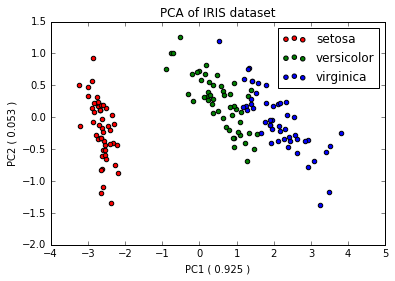

In [7]:
# Percentage of variance explained for each component
vr = pca.explained_variance_ratio_
print('explained variance ratio (first two components): %s'
      % str(vr))

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.xlabel('PC1 ( %0.3f )' % vr[0])
plt.ylabel('PC2 ( %0.3f )' % vr[1])
plt.title('PCA of IRIS dataset')
plt.show()

Exercise 1: plot the 1st PC vs 3r PC.

In [ ]:
# Your code here



In [ ]:
Exercise 2: plot the variances eplained by the PCs. How many PCs are needed for this dataset?

In [ ]:
# Your code here



In [8]:
# LDA, select only 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

print(X_r2.shape)

(150, 2)


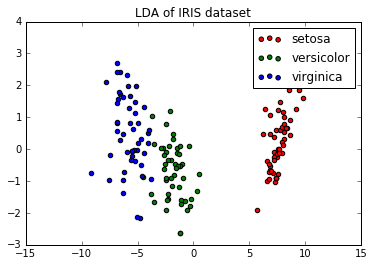

In [9]:
plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('LDA of IRIS dataset')

plt.show()